In [16]:
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('passengers2.csv')
df

,Month,reference,target,missing
0,1949-01-01,112,112.0,NaN
1,1949-02-01,118,118.0,NaN
2,1949-03-01,132,132.0,NaN
3,1949-04-01,129,NaN,129.0
4,1949-05-01,121,121.0,NaN
...,...,...,...,...
139,1960-08-01,606,606.0,NaN
140,1960-09-01,508,508.0,NaN
141,1960-10-01,461,461.0,NaN
142,1960-11-01,390,390.0,NaN


In [18]:
df_right = df[['Month', 'reference']]

In [19]:
df_ = df[['Month', 'target']]
df_

,Month,target
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,NaN
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


# Задание 1

In [20]:
df1 =df_.copy()
df1.target.fillna(method='ffill', inplace=True) # можно: df2['target'].fillna(df2['target'].shift(1))

/var/folders/2j/x2f5hrnj12d0cfdtkkyd8l340000gn/T/ipykernel_27040/3444340236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.target.fillna(method='ffill', inplace=True) # можно: df2['target'].fillna(df2['target'].shift(1))
/var/folders/2j/x2f5hrnj12d0cfdtkkyd8l340000gn/T/ipykernel_27040/3444340236.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.target.fillna(method='ffill', inplace=True) # можно: df2['target'].fillna(df2['ta

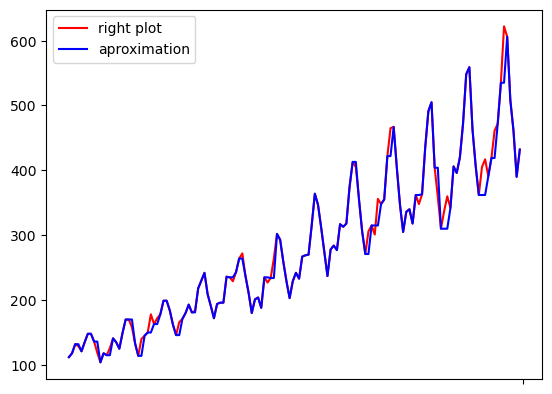

In [31]:
plt.plot(df_right['Month'], df_right['reference'], color='red', label='right plot')
plt.plot(df1['Month'], df1['target'], color='blue', label='aproximation')
plt.legend()
plt.xticks('') # Отключаю xtics потому что месяцев слишком много, отображается плохо
plt.show()

# Задание 2
### Вручную

In [22]:
df2_hands = df_.copy()
window_size = 3
def mean_(x):
    x_ = [i for i in x if not pd.isna(i)]
    return sum(x_) / len(x_)
df2_hands.target = df2_hands.target.rolling(window=window_size, min_periods=1).apply(mean_)
df2_hands

,Month,target
0,1949-01-01,112.000000
1,1949-02-01,115.000000
2,1949-03-01,120.666667
3,1949-04-01,125.000000
4,1949-05-01,126.500000
...,...,...
139,1960-08-01,570.500000
140,1960-09-01,557.000000
141,1960-10-01,525.000000
142,1960-11-01,453.000000


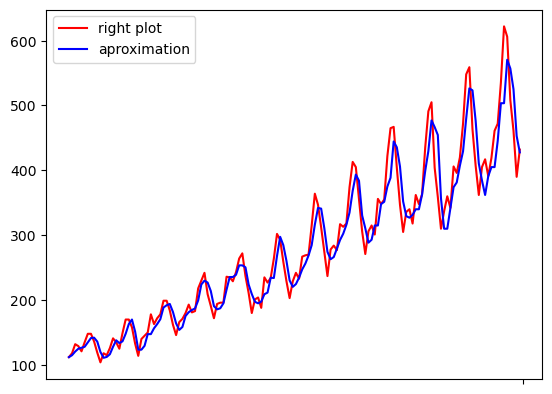

In [23]:
plt.plot(df_right['Month'], df_right['reference'], color='red', label='right plot')
plt.plot(df2_hands['Month'], df2_hands['target'], color='blue', label='aproximation')
plt.legend()
plt.xticks('')
plt.show()

### Встроеным методом

In [24]:
df2_method = df_.copy()
df2_method.target = df2_method.target.rolling(window=window_size, min_periods=1).apply(pd.Series.mean)
df2_method

,Month,target
0,1949-01-01,112.000000
1,1949-02-01,115.000000
2,1949-03-01,120.666667
3,1949-04-01,125.000000
4,1949-05-01,126.500000
...,...,...
139,1960-08-01,570.500000
140,1960-09-01,557.000000
141,1960-10-01,525.000000
142,1960-11-01,453.000000


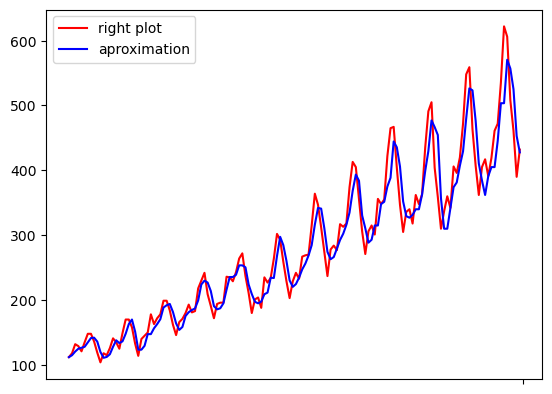

In [25]:
plt.plot(df_right['Month'], df_right['reference'], color='red', label='right plot')
plt.plot(df2_method['Month'], df2_method['target'], color='blue', label='aproximation')
plt.legend()
plt.xticks('')
plt.show()

# Задание 3
### Вручную


Так как x0, x и x1 идут всегда с шагом 1, формула меняется к очень простому виду, и на самом деле становится такой же как и в прошлом варианте

In [26]:
def interpolate(y):
    if len(y) == 1:
        return y[0]
    if not pd.isna(y.iloc[1]):
        return y.iloc[1]
    return (y.iloc[0] + y.iloc[2])/2

df3_hands = df_.copy()
df3_hands['target'] = df3_hands['target'].rolling(window=3, min_periods=1).apply(interpolate)
df3_hands

,Month,target
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,118.0
3,1949-04-01,132.0
4,1949-05-01,126.5
...,...,...
139,1960-08-01,570.5
140,1960-09-01,606.0
141,1960-10-01,508.0
142,1960-11-01,461.0


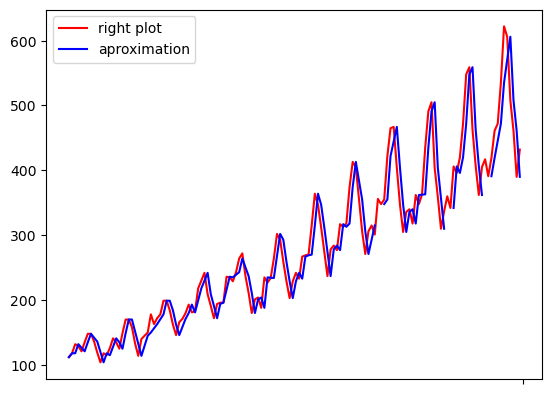

In [27]:
plt.plot(df_right['Month'], df_right['reference'], color='red', label='right plot')
plt.plot(df3_hands['Month'], df3_hands['target'], color='blue', label='aproximation')
plt.legend()
plt.xticks('')
plt.show()

### Встроенным методом

In [28]:
df3_method = df_.copy()
df3_method.target.interpolate(inplace=True)

/var/folders/2j/x2f5hrnj12d0cfdtkkyd8l340000gn/T/ipykernel_27040/3238864553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3_method.target.interpolate(inplace=True)


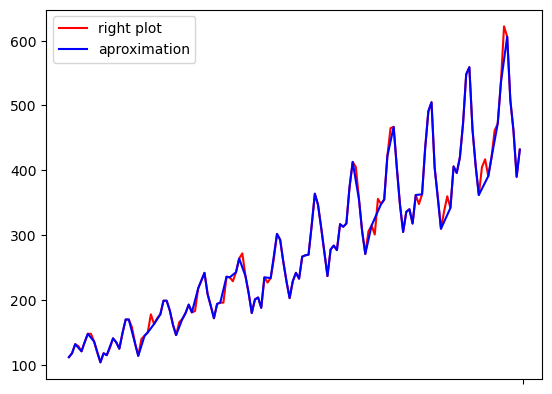

In [29]:
plt.plot(df_right['Month'], df_right['reference'], color='red', label='right plot')
plt.plot(df3_method['Month'], df3_method['target'], color='blue', label='aproximation')
plt.legend()
plt.xticks('')
plt.show()